# IBM Employee Attrition & Performance EDA

In this tutorial, we'll analyze the StackOverflow developer survey dataset. The dataset contains responses to an annual survey conducted by StackOverflow. You can find the raw data & official analysis here: https://insights.stackoverflow.com/survey.

There are several options for getting the dataset into Jupyter:

- Download the CSV manually and upload it via Jupyter's GUI
- Use the `urlretrieve` function from the `urllib.request` to download CSV files from a raw URL
- Use a helper library, e.g., [`opendatasets`](https://github.com/JovianML/opendatasets), which contains a collection of curated datasets and provides a helper function for direct download.

We'll use the `opendatasets` helper library to download the files.

## Environment setup

Let's begin by downloading the data, and listing the files within the dataset

In [5]:
!pip install opendatasets --upgrade --quiet

In [6]:
dataset_url = 'https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset'

In [7]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: 
Your Kaggle username: 
Your Kaggle username: 
Your Kaggle username: 
Your Kaggle username: irisle2712
Your Kaggle Key: ········


100%|██████████| 50.1k/50.1k [00:00<00:00, 5.17MB/s]

In [15]:
data_dir = './ibm-hr-analytics-attrition-dataset'

In [16]:
import os
os.listdir(data_dir)

['WA_Fn-UseC_-HR-Employee-Attrition.csv']

Then, save and upload our work to Jovian before continuing

In [17]:
project_name = "IBM-Employee-Attrition-&-Performance-EDA"

In [18]:
import jovian

In [19]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "irisle2712/ibm-employee-attrition-performance-eda" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/irisle2712/ibm-employee-attrition-performance-eda


'https://jovian.ai/irisle2712/ibm-employee-attrition-performance-eda'

## Data Preparation and Cleaning

> 

In [20]:
import pandas as pd
import numpy as np

In [21]:
ibm_df = pd.read_csv('./ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv')
ibm_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [22]:
ibm_df.shape

(1470, 35)

In [23]:
ibm_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [24]:
ibm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [25]:
# Check the values of all columns 
for column in ibm_df.columns:
    print('No. of values for {} is {}'.format(column, ibm_df[column].nunique()))

No. of values for Age is 43
No. of values for Attrition is 2
No. of values for BusinessTravel is 3
No. of values for DailyRate is 886
No. of values for Department is 3
No. of values for DistanceFromHome is 29
No. of values for Education is 5
No. of values for EducationField is 6
No. of values for EmployeeCount is 1
No. of values for EmployeeNumber is 1470
No. of values for EnvironmentSatisfaction is 4
No. of values for Gender is 2
No. of values for HourlyRate is 71
No. of values for JobInvolvement is 4
No. of values for JobLevel is 5
No. of values for JobRole is 9
No. of values for JobSatisfaction is 4
No. of values for MaritalStatus is 3
No. of values for MonthlyIncome is 1349
No. of values for MonthlyRate is 1427
No. of values for NumCompaniesWorked is 10
No. of values for Over18 is 1
No. of values for OverTime is 2
No. of values for PercentSalaryHike is 15
No. of values for PerformanceRating is 2
No. of values for RelationshipSatisfaction is 4
No. of values for StandardHours is 1
No

As is seen in the output above, since the value of `EmployeeCount`, `Over18`, `StandardHours` is 1, and `EmployeeNumber` is 1470, we can remove these column in the DataFrame

In [26]:
# Remove unnecessary columns in the copy DataFrame
ibm_df_new = ibm_df.copy()
ibm_df_new.drop(['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'], axis = 'columns', inplace = True)

ibm_df_new.shape

(1470, 31)

In [27]:
import jovian

jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "irisle2712/ibm-employee-attrition-performance-eda" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/irisle2712/ibm-employee-attrition-performance-eda


'https://jovian.ai/irisle2712/ibm-employee-attrition-performance-eda'

## Exploratory Data Analysis and Visualization

>- Find pattenrs of data through visualization and reveal hidden data trends via graphs, analysis, and charts
>- Use matplotlib and seaborn library to visualize the data
>- Find relationships between features using bar graphs, histograms, heatmaps, etc.
>- Analyze seperately both categorical and numerical features
>- Create a correlation matrix to inspect the relationships

Let's begin by importing neccessary libraries: `matplotlib.pyplot` and `seaborn`

In [30]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### 📉 Categorical Features

> Visualizing all the columns that has `object` datatypes and has unique values less than `30`

In [31]:
categorical_col = []
for column in ibm_df_new.columns:
    if ibm_df_new[column].dtype == object and len(ibm_df_new[column].unique()) <= 30:
        print("{}: {}".format(column, ibm_df_new[column].unique()))
        print(ibm_df_new[column].value_counts())
        print("==================================================")
        categorical_col.append(column)

Attrition: ['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
BusinessTravel: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
Department: ['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
EducationField: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
Gender: ['Female' 'Male']
Male      882
Female    588
Name: Gender, dtype: int64
JobRole: ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resour

In [32]:
len(categorical_col)

8

In [33]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
ibm_df_new["Attrition"] = label.fit_transform(ibm_df_new.Attrition)

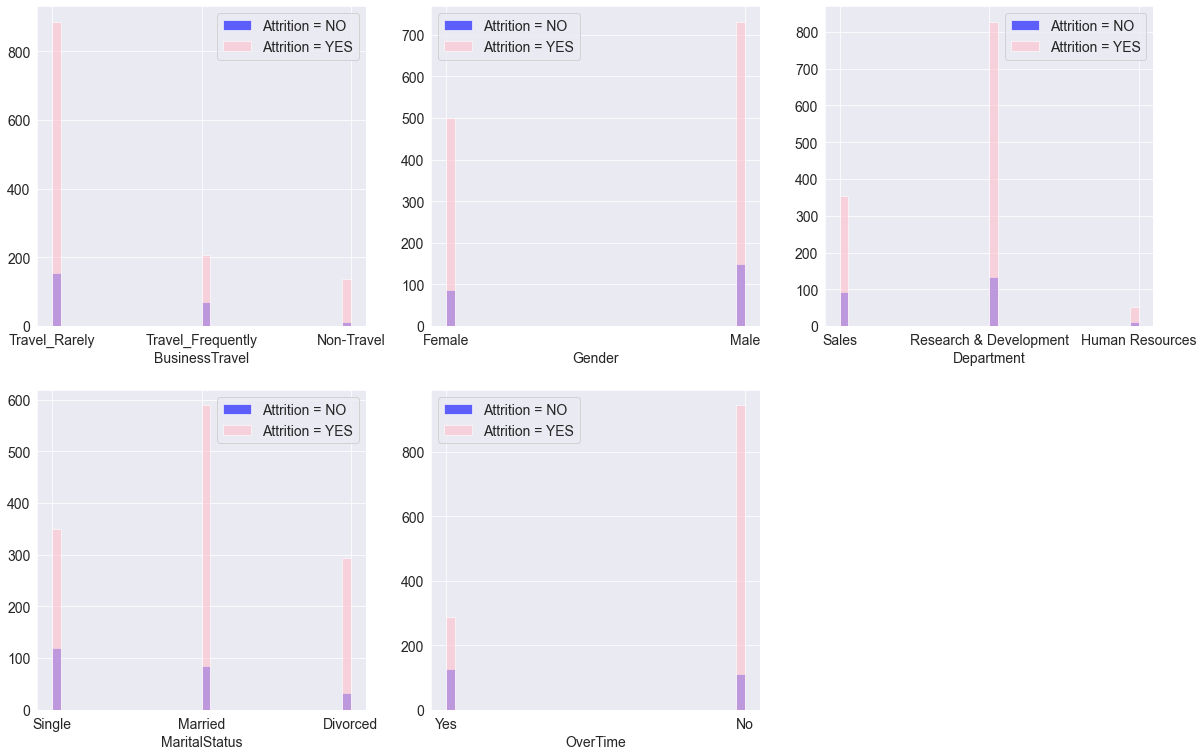

In [34]:
plt.figure(figsize=(20,20))
categorical_col_new = ['BusinessTravel','Gender','Department','MaritalStatus','OverTime']
for i, column in enumerate(categorical_col_new, 1):
    plt.subplot(3,3,i)
    ibm_df_new[ibm_df_new["Attrition"] == 1][column].hist(bins=36, color='blue', label='Attrition = NO', alpha=0.6)
    ibm_df_new[ibm_df_new["Attrition"] == 0][column].hist(bins=36, color='pink', label='Attrition = YES', alpha=0.6)
    plt.xlabel(column)
    plt.legend()

### 📉 Numerical Features

> Visualizing all the columns that has `int` datatypes and has unique values less than `30`


In [35]:
numerical_col = []
for column in ibm_df_new.columns:
    if ibm_df_new[column].dtype != object and len(ibm_df_new[column].unique()) <= 30:
        print("{}: {}".format(column, ibm_df_new[column].unique()))
        print("==================================================")
        numerical_col.append(column)
        
numerical_col.remove('Attrition')

Attrition: [1 0]
DistanceFromHome: [ 1  8  2  3 24 23 27 16 15 26 19 21  5 11  9  7  6 10  4 25 12 18 29 22
 14 20 28 17 13]
Education: [2 1 4 3 5]
EnvironmentSatisfaction: [2 3 4 1]
JobInvolvement: [3 2 4 1]
JobLevel: [2 1 3 4 5]
JobSatisfaction: [4 2 3 1]
NumCompaniesWorked: [8 1 6 9 0 4 5 2 7 3]
PercentSalaryHike: [11 23 15 12 13 20 22 21 17 14 16 18 19 24 25]
PerformanceRating: [3 4]
RelationshipSatisfaction: [1 4 2 3]
StockOptionLevel: [0 1 3 2]
TrainingTimesLastYear: [0 3 2 5 1 4 6]
WorkLifeBalance: [1 3 2 4]
YearsInCurrentRole: [ 4  7  0  2  5  9  8  3  6 13  1 15 14 16 11 10 12 18 17]
YearsSinceLastPromotion: [ 0  1  3  2  7  4  8  6  5 15  9 13 12 10 11 14]
YearsWithCurrManager: [ 5  7  0  2  6  8  3 11 17  1  4 12  9 10 15 13 16 14]


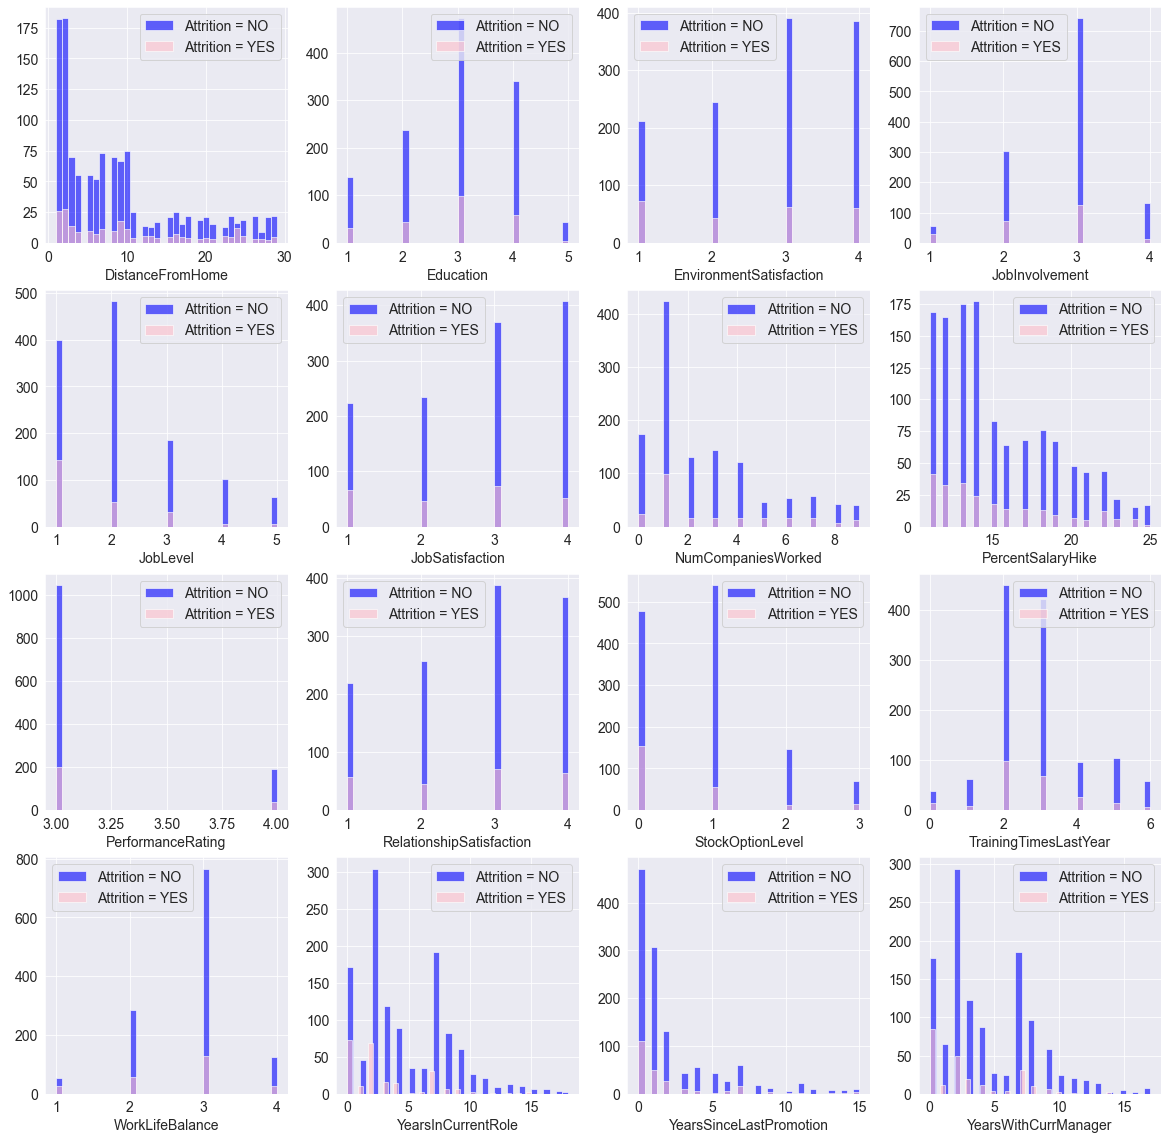

In [36]:
plt.figure(figsize=(20, 20))

for i, column in enumerate(numerical_col, 1):
    plt.subplot(4, 4, i)
    ibm_df_new[ibm_df_new["Attrition"] == 0][column].hist(bins=36, color='blue', label='Attrition = NO', alpha=0.6)
    ibm_df_new[ibm_df_new["Attrition"] == 1][column].hist(bins=36, color='pink', label='Attrition = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

> Visualizing all the columns that has `int` datatypes and has unique values more than `30`

In [37]:
numerical_col_more = []
for column in ibm_df_new.columns:
    if ibm_df_new[column].dtypes != object and len(ibm_df_new[column].unique()) > 30:
        print("{}: Minimum: {}, Maximum: {}".format(column, ibm_df_new[column].min(), ibm_df_new[column].max()))
        numerical_col_more.append(column)
        print("====================================")

Age: Minimum: 18, Maximum: 60
DailyRate: Minimum: 102, Maximum: 1499
HourlyRate: Minimum: 30, Maximum: 100
MonthlyIncome: Minimum: 1009, Maximum: 19999
MonthlyRate: Minimum: 2094, Maximum: 26999
TotalWorkingYears: Minimum: 0, Maximum: 40
YearsAtCompany: Minimum: 0, Maximum: 40


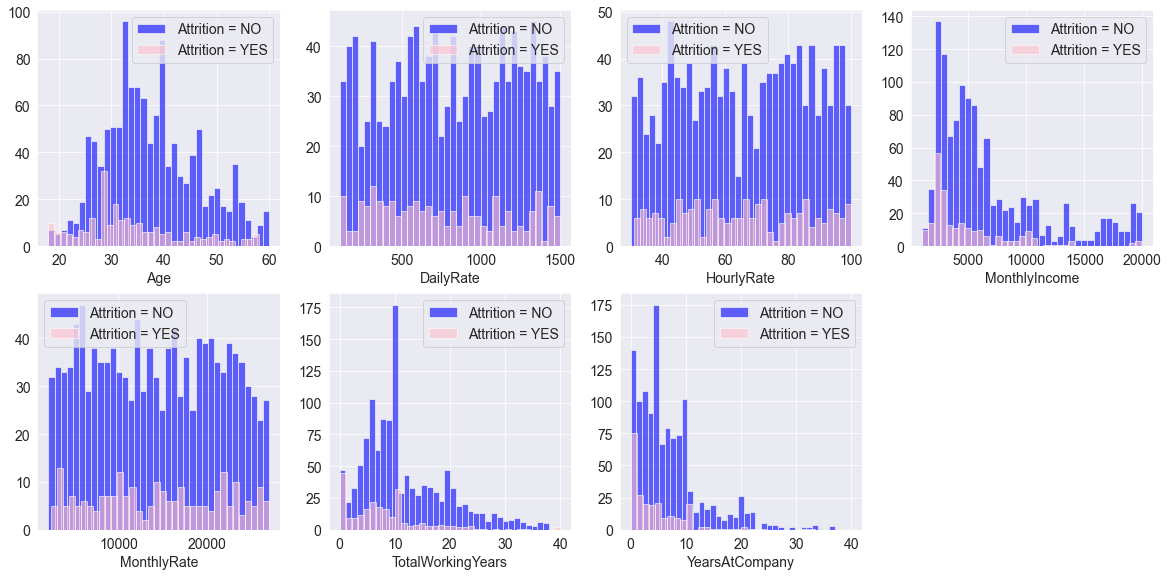

In [38]:
plt.figure(figsize=(20, 20))

for i, column in enumerate(numerical_col_more, 1):
    plt.subplot(4, 4, i)
    ibm_df_new[ibm_df_new["Attrition"] == 0][column].hist(bins=36, color='blue', label='Attrition = NO', alpha=0.6)
    ibm_df_new[ibm_df_new["Attrition"] == 1][column].hist(bins=36, color='pink', label='Attrition = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

### 📝 Categorial and Numerical Conclusions
- The workers with low `JobLevel`, `MonthlyIncome`, `YearAtCompany`, and `TotalWorkingYears` are more likely to quit there jobs.

- `BusinessTravel` : The workers who travel alot are more likely to quit then other employees.

- `Department` : The worker in `Research & Development` are more likely to stay than the workers on other departement.

- `EducationField` : The workers with `Human Resources and Technical Degree` are more likely to quit then employees from other fields of educations.

- `Gender` : The `Male` are more likely to quit.

- `JobRole` : The workers in `Laboratory Technician`, `Sales Representative`, and `Human Resources` are more likely to quit the workers in other positions.

- `MaritalStatus` : The workers who have `Single` marital status are more likely to quit than those who are `Married`, and `Divorced`.

- `OverTime` : The workers who work more hours are likely to quit then others.

In [39]:
# Save to notebook
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "irisle2712/ibm-employee-attrition-performance-eda" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/irisle2712/ibm-employee-attrition-performance-eda


'https://jovian.ai/irisle2712/ibm-employee-attrition-performance-eda'

-------------------------------------------------------------------------------------------------------------------------------

### 📉 Correlation Matrix
> Inspecting the relationships between the columns

<AxesSubplot:>

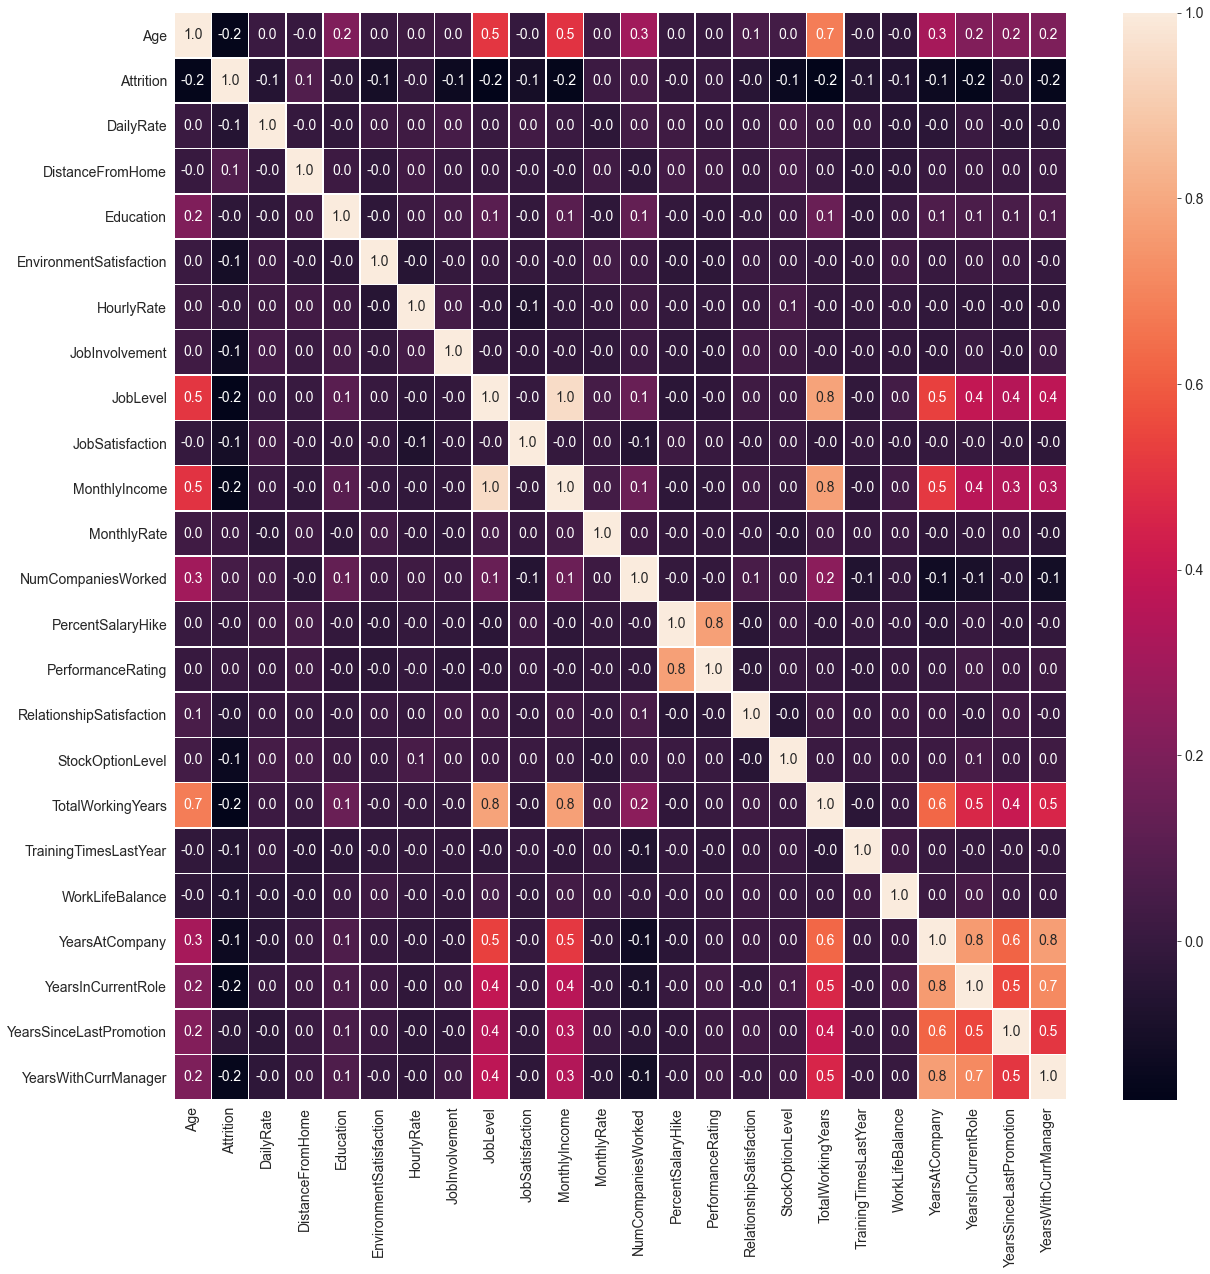

In [40]:
f,ax=plt.subplots(figsize=(20,20))
sns.heatmap(ibm_df_new.corr(),annot=True,linewidth=.5,fmt='.1f')

### 📝 Correlation Matrix Conclusions
- `JobLevel` and `MonthlyIncome`has strong correlation
- `Age` is positively correlated with both `JobLevel` and `MonthlyIncome`
- `TotalWorkingYears` is highly correlated with both `JobLevel` and `MonthlyIncome`
- Same feature is also highly correlated with `Age`
- The higher the `PerformanceRating`, the higher the `PercentSalaryHike`

In [41]:
# Save to notebook
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "irisle2712/ibm-employee-attrition-performance-eda" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/irisle2712/ibm-employee-attrition-performance-eda


'https://jovian.ai/irisle2712/ibm-employee-attrition-performance-eda'

## Asking and Answering Questions

We've already gained several insights about the respondents and the programming community by exploring individual columns of the dataset. Below are some specific questions and try to answer them using data frame operations and visualizations.

### ✔️Q1: Do the working `Department` and `JobRole` impact the attrition rate?

To answer, this we can use the `EducationField` and `JobRole` column, and calculate the `Attrition` rate.

In [42]:
# Yes/No Attrition
atrrition_yes_df = ibm_df[ibm_df['Attrition']=='Yes']
atrrition_no_df = ibm_df[ibm_df['Attrition']=='No']

# EducationField value counts correlated to Y/N Attrition
department_yes = atrrition_yes_df['Department'].value_counts()
department_no = atrrition_no_df['Department'].value_counts()

# JobRole value counts correlated to Y/N Attrition
job_role_yes = atrrition_yes_df['JobRole'].value_counts()
job_role_no = atrrition_no_df['JobRole'].value_counts()



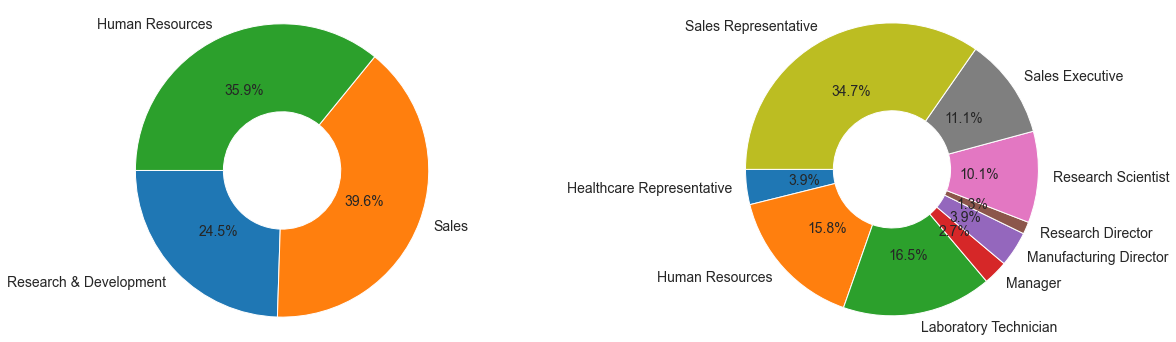

In [43]:
fig, axes = plt.subplots(1,2, figsize=(20, 6))

# Pie chart with wide wedgeprop for EducationField
axes[0].pie((department_yes*100/department_no), wedgeprops=dict(width=0.6), labels=(department_yes/department_no).index,autopct='%1.1f%%', startangle=180);
axes[0].text(0., 0., '', horizontalalignment='center', verticalalignment='center')
axes[0].axis('equal')

# Pie chart with wide wedgeprop for JobRole
axes[1].pie((job_role_yes*100/job_role_no), wedgeprops=dict(width=0.6), labels=(job_role_yes/job_role_no).index,autopct='%1.1f%%', startangle=180);
axes[1].text(0., 0., '', horizontalalignment='center', verticalalignment='center')
axes[1].axis('equal')

# Display charts
plt.show()

As displayed above:
- `Sales`(39.6%) department has the highest attrition rates, follows up by `Human Resources`(35.9%) and `Research & Development`(24.5%)
- `Sales Representative` has the highest attrition rates (34.7%), following by `Laboratory Technician` (16.5%) and `Human  Resources`(15.8%)
- `Research Director`(1.3%), `Manufacturing Director` & `Healthcare Representative`(3.9%), `Manager`(2.7%) have the lowest attrition rates

### ✔️Q2: How the attrition rate is affected by both `MonthlyIncome` based on `JobRole`?

We visualize `MonthlyIncome` and `JobRole` and the `% Attrition`of JobRole value_counts to Yes/No answers via a combo chart

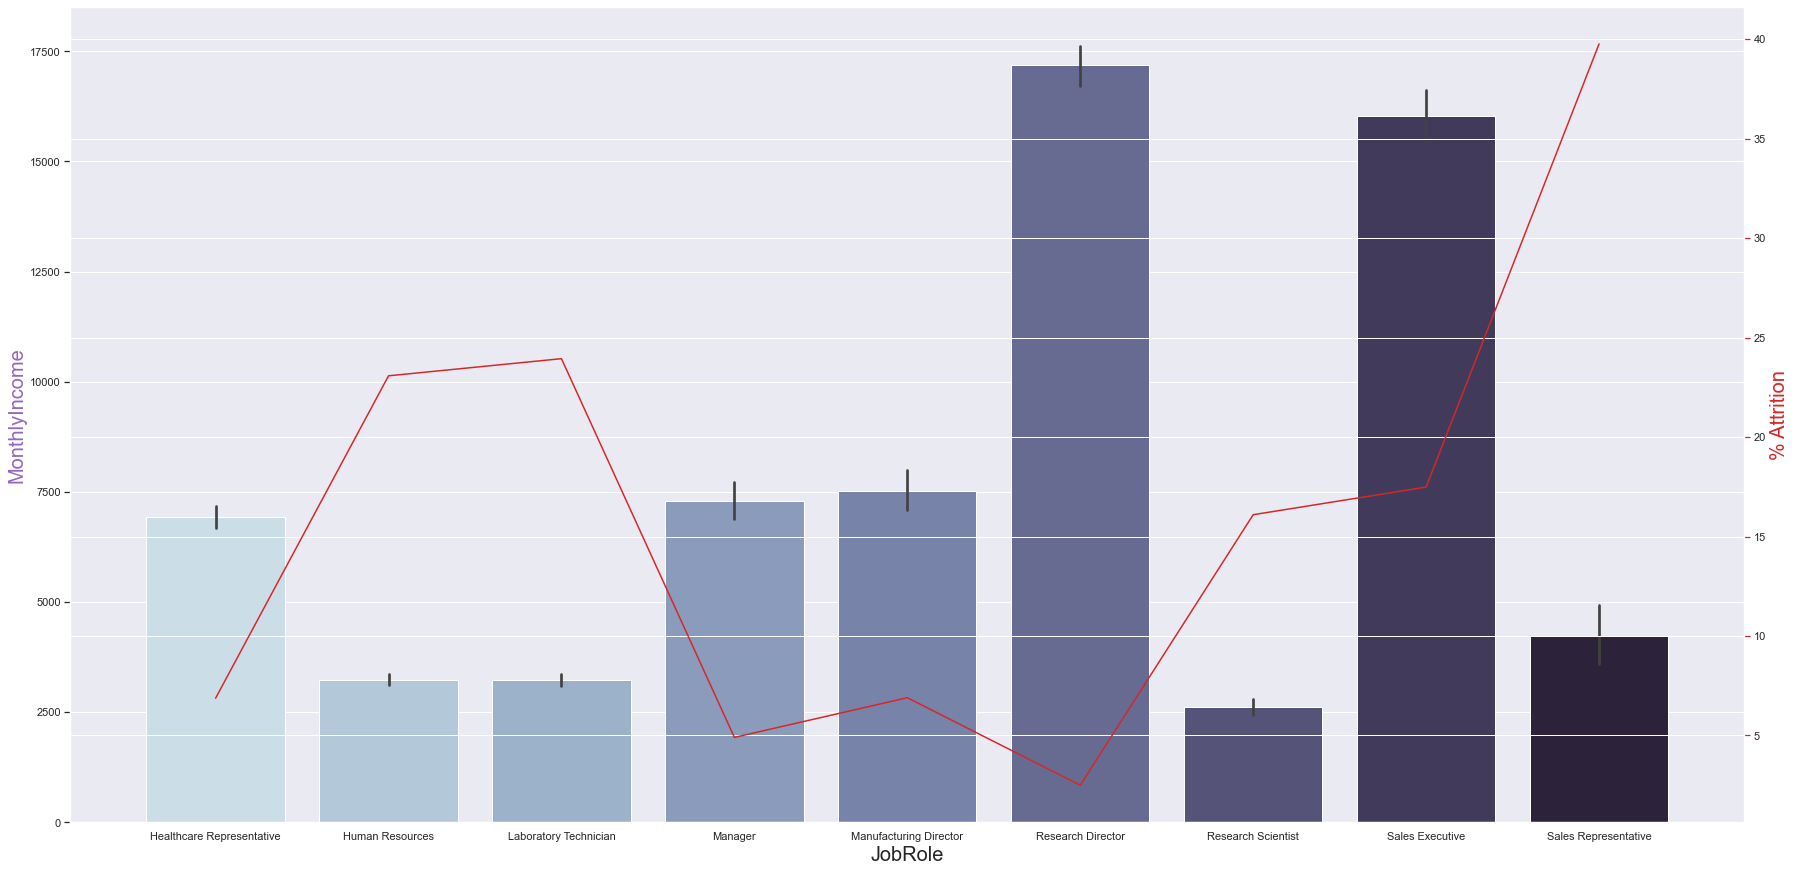

In [237]:
# Create combo chart
fig, ax1 = plt.subplots(figsize=(30,15))
color = 'tab:purple'

# Bar plot creation
ax1.set_xlabel('JobRole', fontsize=20)
ax1.set_ylabel('MonthlyIncome', fontsize=20, color=color)
ax1 = sns.barplot(x='JobRole', y='MonthlyIncome', data = ibm_df, palette='ch:s=.25,rot=-.25')
ax1.tick_params(axis='y')

# Calculate and add Attrition rates
attrition_rate = pd.DataFrame(pd.crosstab(ibm_df['JobRole'],ibm_df['Attrition']))
attrition_rate.insert(2, 'Attr%', value = (job_role_yes/(job_role_no + job_role_yes) *100))

# Specify that we want to share the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'

# Line plot creation
ax2.set_ylabel('% Attrition', fontsize=20, color=color)
ax2 = sns.lineplot(x='JobRole', y='Attr%', data= attrition_rate, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

plt.show()

As displayed above: 
- The lower the `MonthlyIncome`, the higher the `% Attrition` (max = Sales Representative, min = Research Director) 

### ✔️Q3: How does promotion affect the attrition rate?

To answer, a scatter plot will be visualized with `YearsSinceLastPromotion` and `No of Associates`

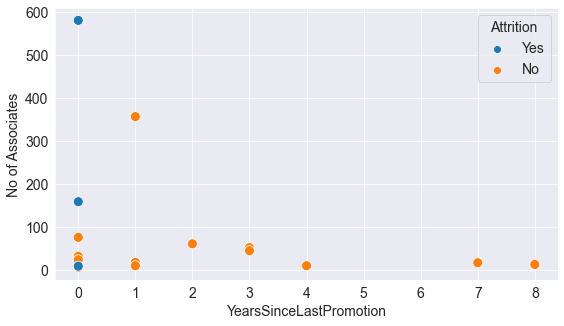

In [103]:
yearpromo_count_df=ibm_df['YearsSinceLastPromotion'].value_counts()

#Scatter plot creation
sns.scatterplot(x=ibm_df.YearsSinceLastPromotion, y=yearpromo_count_df, hue=ibm_df.Attrition, s=100)
plt.xlabel("YearsSinceLastPromotion")
plt.ylabel("No of Associates");

As displayed above:
- All of the employees who got promoted within less than 1 year, attrited
- This may illustrate the pattern of the employees stay at the company and wait until their promotion while start looking for opportunities outside

### ✔️Q4: How does years of working affect the attrition rate?

To answer, a scatter plot will be visualized with `YearsInCurrentRole` and `No of Associates`

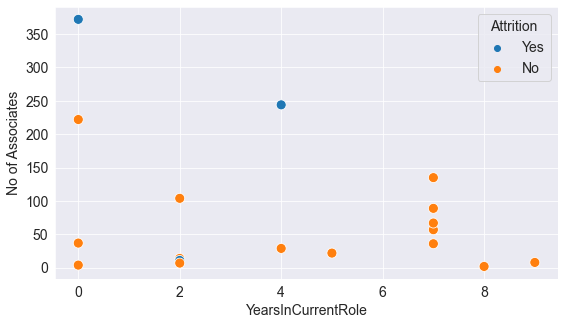

In [107]:
yearincurrentrole_count_df=ibm_df['YearsInCurrentRole'].value_counts()

#Scatter plot creation
sns.scatterplot(x=ibm_df.YearsInCurrentRole, y=yearincurrentrole_count_df, hue=ibm_df.Attrition, s=100)
plt.xlabel("YearsInCurrentRole")
plt.ylabel("No of Associates");

As displayed above:
- Most of the employees with less than 2 years in current role, attrited
- Also, there are a high number of employees with approx 4 years of working, attrited
- This may illustrate the pattern of the employees stay at the company and wait until their promotion while start looking for opportunities outside as mentioned above & the employees with approx 4 years of working tend to attrite based on the desire to change workplace, jobrole or occupancy

### ✔️Q5: Does the company stocks for employee impact the attrition rate?

We visualize `StockOptionLevel` and `Counts of holder` and the `% Attrition`of StockOptionLevel value_counts to Yes/No answers via a multiple combo chart

In [232]:
# StockOptionLevel value counts correlated to Y/N Attrition
stock_option_count = ibm_df_new['StockOptionLevel'].value_counts()
stockoption_yes = atrrition_yes_df['StockOptionLevel'].value_counts()
stockoption_no = atrrition_no_df['StockOptionLevel'].value_counts()

# Calculate and add Attrition rates
stock_count = pd.DataFrame(pd.crosstab(ibm_df['StockOptionLevel'],ibm_df['Attrition']))
stock_count.insert(2, 'Attr%', value = (stockoption_yes/stockoption_no *100))
stock_count.insert(2, 'Counts', value = stock_option_count)

stock_count

Attrition,No,Yes,Counts,Attr%
StockOptionLevel,,,,
0,477,154,631,32.285115
1,540,56,596,10.370370
2,146,12,158,8.219178
3,70,15,85,21.428571


In [230]:
# Create DataFrame for valid interpretation of 'StockOptionLevel' input
stock_att=ibm_df.groupby(['StockOptionLevel','Attrition']).apply(lambda x:x['StockOptionLevel'].count()).reset_index(name='Counts')

stock_att

,StockOptionLevel,Attrition,Counts
0,0,No,477
1,0,Yes,154
2,1,No,540
3,1,Yes,56
4,2,No,146
5,2,Yes,12
6,3,No,70
7,3,Yes,15


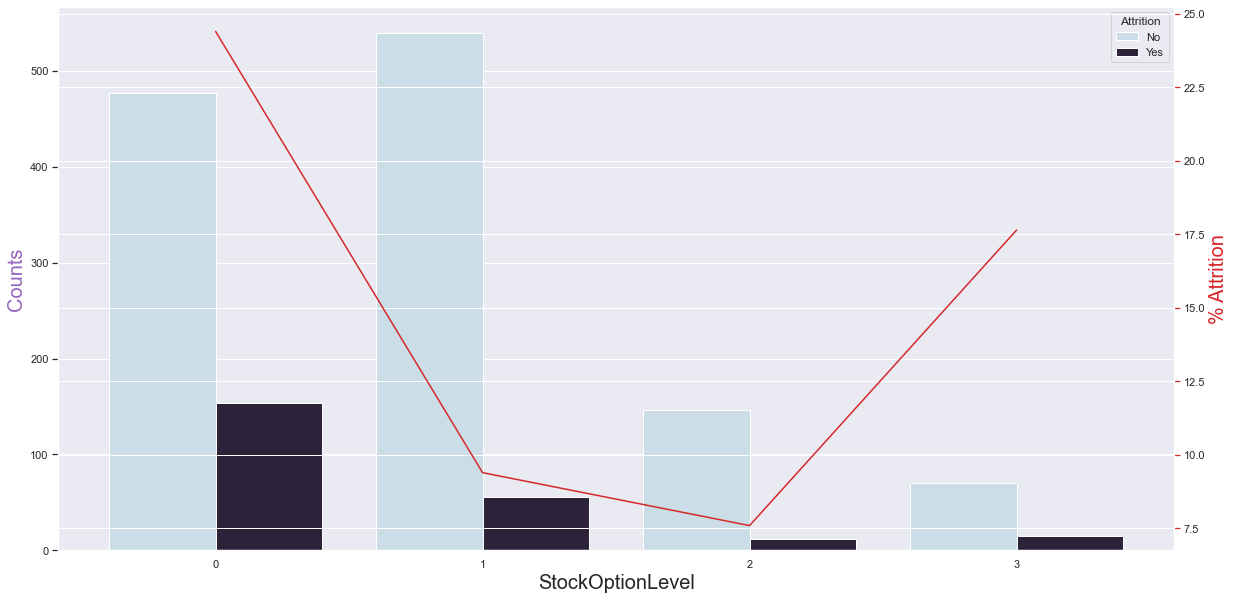

In [231]:
# Create combo chart
fig, ax1 = plt.subplots(figsize=(20,10))
color = 'tab:purple'

# Bar plot creation
ax1.set_xlabel('StockOptionLevel', fontsize=20)
ax1.set_ylabel('Counts', fontsize=20, color=color)
ax1 = sns.barplot(x='StockOptionLevel', y='Counts', hue='Attrition',data = stock_att, palette='ch:s=.25,rot=-.25')

# Calculate and add Attrition rates
stock_count = pd.DataFrame(pd.crosstab(ibm_df['StockOptionLevel'],ibm_df['Attrition']))
stock_count.insert(2, 'Attr%', value = (stockoption_yes/(stockoption_no + stockoption_yes) *100))
stock_count.insert(2, 'Counts', value = stock_option_count)

# Specify that we want to share the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'

# Line plot creation
ax2.set_ylabel('% Attrition', fontsize=20, color=color)
ax2 = sns.lineplot(x='StockOptionLevel', y='Attr%', data=stock_count, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

plt.show()

As displayed above:

- The employees with limited `StockOptionLevel`(0) have higher attrition rates(24.4%)
- Since the `StockOptionLevel` raises much higher(3), the holder might want to attrite to receive the benefits (21.4%) to move to other jobrole, or company

In [239]:
# Save to notebook
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "irisle2712/ibm-employee-attrition-performance-eda" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/irisle2712/ibm-employee-attrition-performance-eda


'https://jovian.ai/irisle2712/ibm-employee-attrition-performance-eda'

## Inferences and Conclusions

We've drawn many inferences from the survey. Here's a summary of a few of them:
- People are tending to switch to a different jobs at the start of their careers or at the earlier parts of it  (0-1 year of working duration). Once they have settled with a family or have found stability in their jobs, they tend to stay long in the same organization- only going for vertical movements in the same organization.
- Salary and stock options have a great motivation on the employees and people tend to leave the organization much lesser. Higher pay and more stock options have seen more employees remain loyal to their company.
- Promotion is also a fundamental factor affecting employees' decisions to leave the org as those who got promoted within less than a year attrite while others stay at the company and wait until their promotion while start looking for opportunities outside
- Departments where target meeting performance is very much crucial (for e.g. Sales) tend to have a greater chances of leaving the organization in comparison to departments with more administration perspective (For e.g. Human Resources)
- Employees within departments as HR, Sales, and R&D having low monthly income (except those at managerial level) also tend to leave the organization

In [240]:
# Save to notebook
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "irisle2712/ibm-employee-attrition-performance-eda" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/irisle2712/ibm-employee-attrition-performance-eda


'https://jovian.ai/irisle2712/ibm-employee-attrition-performance-eda'

## References
- https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas
- https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset
- https://matplotlib.org/3.1.1/index.html
- https://seaborn.pydata.org/examples/index.html
- https://pandas.pydata.org/pandas-docs/stable/index.html

## Submission

In [241]:
jovian.submit(assignment="zero-to-pandas-project")

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "irisle2712/ibm-employee-attrition-performance-eda" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/irisle2712/ibm-employee-attrition-performance-eda
[jovian] Submitting assignment..
[jovian] Verify your submission at https://jovian.ai/learn/data-analysis-with-python-zero-to-pandas/assignment/course-project
